<a href="https://colab.research.google.com/github/munmoom/Crawler_collaborate/blob/main/%ED%95%A9%EC%B9%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\Desktop\기컴프_컴사인\python.exe -m pip install --upgrade pip' command.


In [50]:
from urllib.request import urlopen
url='https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=FILE&keyword=%EC%BD%94%EB%A1%9C%EB%82%98&detailKeyword=&publicDataPk=&recmSe=&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=_score&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode='
htmlData=urlopen(url).read()
htmlData=htmlData.decode('utf8')
from bs4 import BeautifulSoup as bs
html=bs(htmlData,'html.parser')

ul = html.select('#fileDataList > div.result-list > ul > li')

who = []
for item in ul:
  num = item.find_all("span", class_='tit')
  who.append(num)

import re
ti=[]
who = who[0]

for a in range(4):
    tit = who[a]
    tit = str(tit)
    tit = re.sub('<.+?>','', tit, a).strip()
    ti.append(tit)

string = ti[1]
string = string[0:3]
del ti[1]
ti.insert(1, string)

whole = []
for item in ul:
  num = item.find_all("span", class_='data')
  whole.append(num)


import re
lis=[]
for i in range(10):
  ko = whole[i]
  for a in range(4):
    li = ko[a]
    li = str(li)
    li = re.sub('<.+?>','', li, a).strip()
    lis.append(li)

for i in range(10):
  k = 2+4*i-1
  date = str(lis[k])[0:10]
  del lis[k]
  lis.insert(k, date)





from urllib.request import urlopen
url='https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=FILE&keyword=%EC%BD%94%EB%A1%9C%EB%82%98&detailKeyword=&publicDataPk=&recmSe=&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=_score&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode='
htmlData=urlopen(url).read()
htmlData=htmlData.decode('utf8')
from bs4 import BeautifulSoup as bs
html=bs(htmlData,'html.parser')
ul=html.select('#fileDataList > div.result-list > ul')
head = []
for item in ul:
  title = item.find_all("span", class_='title')
  head.append(title)

import re
ABC=[]
header = head[0]
for i in range(10):
  no=header[i]
  no=str(no)
  no = re.sub('<.+?>', '', no, i).strip()
  for k in range(1,3):
    no = re.sub('<.+?>', '', no, k).strip()

  no = re.sub('<.+?>', '', no, 2).strip()
  ABC.append(no)







import pandas as pd




fi = []
sec  = []
th  = []
fo  = []

for i in range(10):
 fi.append(lis[4*i])
 sec.append(lis[1+4*i])
 th.append(lis[2+4*i])
 fo.append(lis[3+4*i])

A=[]
B=[]

for i in range(10):
  ite = int(th[i])
  A.append(ite)

for i in range(10):
  ite = int(fo[i])
  B.append(ite)


df = pd.DataFrame()
df['제목']=ABC
df['제공기관']=fi
df['수정일']=sec
df['조회수']=A
df['다운로드']=B

df


,제목,제공기관,수정일,조회수,다운로드
0,한국언론진흥재단_뉴스빅데이터_메타데이터_코로나,한국언론진흥재단,2021-08-25,20485,40120
1,서울특별시 강동구_코로나동별현황,서울특별시 강동구,2020-09-23,3023,819
2,한국언론진흥재단_코로나19이후국민의일상변화조사_포스트 코로나 사회에 대한 전망,한국언론진흥재단,2021-03-17,3684,1132
3,한국언론진흥재단_코로나19이후국민의일상변화조사_코로나19로 인한 감정 변화,한국언론진흥재단,2021-03-17,11938,4600
4,부산광역시 수영구_코로나 확진자 수,부산광역시 수영구,2022-05-23,1375,234
5,강원도_코로나19 확진자 현황,강원도,2022-03-28,4878,1357
6,서울특별시 용산구_코로나19확진자,서울특별시 용산구,2022-03-17,2530,803
7,서울특별시 용산구_코로나19사망자,서울특별시 용산구,2022-03-17,281,64
8,전라북도 고창군_코로나19 현황,전라북도 고창군,2022-04-01,116,54
9,충청남도 계룡시_코로나19 확진자,충청남도 계룡시,2022-03-24,106,23


In [49]:
with open('1조_서용훈_출력결과.txt','w',encoding='UTF-8') as f1:
    for tt in ABC:
        f1.write(tt+'\n')

with open('1조_문지영_임혜준_출력결과.txt','w',encoding='UTF-8') as f2:
    i=0
    for tt in lis:
      i += 1
      if i != 0 and i%4 == 0:
          f2.write(tt+'\n')
      else:
          f2.write(tt+' ')

In [26]:
%config lnlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

'apt'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [27]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\Desktop\기컴프_컴사인\python.exe -m pip install --upgrade pip' command.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
mpl. font_manager._rebuild()

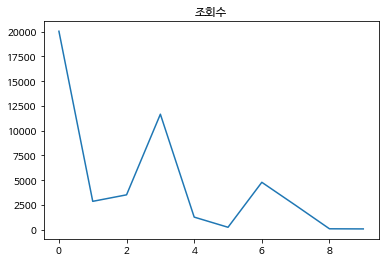

In [ ]:
import matplotlib.pyplot as plt
df['조회수'].plot()
plt.title('조회수')
plt.show()

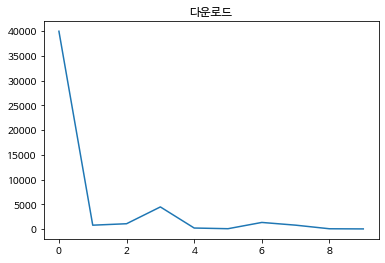

In [ ]:
df['다운로드'].plot()
plt.title('다운로드')
plt.show()

In [51]:
df.to_csv('1조_출력결과.csv',index=False)